# The Spark Foundation

### As a Stock market analyst you have to predict the future Stock prices from Historical Data and News Headlines.

### @ Vinay Namani

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

# nltk.download("stopwords")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

import xgboost

plt.style.use('fivethirtyeight')

In [2]:
# Loadint the Data 
df = pd.read_csv("^IXIC.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-16,11761.830078,11827.419922,11648.530273,11671.559570,11671.559570,3156270000
1,2020-10-19,11732.339844,11778.110352,11454.570313,11478.879883,11478.879883,3455430000
2,2020-10-20,11531.830078,11632.889648,11471.230469,11516.490234,11516.490234,3483200000
3,2020-10-21,11530.389648,11613.790039,11476.080078,11484.690430,11484.690430,3445520000
4,2020-10-22,11526.969727,11548.769531,11369.290039,11506.009766,11506.009766,3414590000


Text(0.5, 1.0, 'Close Price Historical Data')

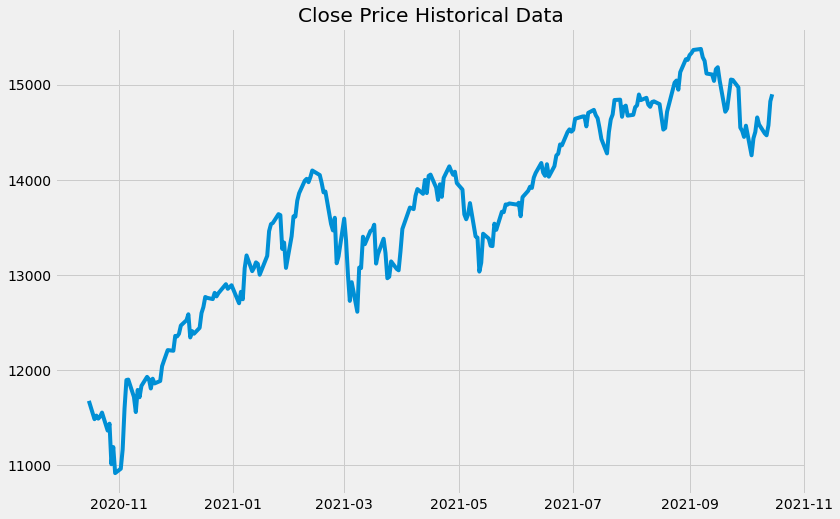

In [3]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")
df.index = df['Date']
df.dropna(inplace=True)

plt.figure(figsize = (12,8))
plt.plot(df['Close'])
plt.title("Close Price Historical Data")

In [4]:
def create_dataset(df2,lookback):
    X_data,y_data = [],[]
    for i in range(len(df2)-lookback-1):
        d = df2[i:i+lookback,0]
        X_data.append(d)
        y_data.append(df2[i + lookback,0])
    return np.array(X_data),np.array(y_data)

In [5]:
df2 = pd.read_csv("^IXIC.csv",usecols=[5])
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(df2)

In [7]:
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train,test = df2[0:train_size,:],df2[train_size:len(df2),:]

In [8]:
lookback = 3
X_train ,y_train = create_dataset(train,lookback)
X_test,y_test = create_dataset(test,lookback)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [9]:
model = Sequential()
model.add(LSTM(7,input_shape=(lookback,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,epochs=100,verbose=2,batch_size=1)

Epoch 1/100
164/164 - 3s - loss: 0.2079
Epoch 2/100
164/164 - 0s - loss: 0.0274
Epoch 3/100
164/164 - 0s - loss: 0.0178
Epoch 4/100
164/164 - 0s - loss: 0.0133
Epoch 5/100
164/164 - 0s - loss: 0.0095
Epoch 6/100
164/164 - 0s - loss: 0.0067
Epoch 7/100
164/164 - 0s - loss: 0.0046
Epoch 8/100
164/164 - 0s - loss: 0.0034
Epoch 9/100
164/164 - 0s - loss: 0.0028
Epoch 10/100
164/164 - 0s - loss: 0.0024
Epoch 11/100
164/164 - 0s - loss: 0.0023
Epoch 12/100
164/164 - 0s - loss: 0.0023
Epoch 13/100
164/164 - 0s - loss: 0.0023
Epoch 14/100
164/164 - 0s - loss: 0.0022
Epoch 15/100
164/164 - 0s - loss: 0.0023
Epoch 16/100
164/164 - 0s - loss: 0.0022
Epoch 17/100
164/164 - 0s - loss: 0.0022
Epoch 18/100
164/164 - 0s - loss: 0.0023
Epoch 19/100
164/164 - 0s - loss: 0.0023
Epoch 20/100
164/164 - 0s - loss: 0.0022
Epoch 21/100
164/164 - 0s - loss: 0.0022
Epoch 22/100
164/164 - 0s - loss: 0.0023
Epoch 23/100
164/164 - 0s - loss: 0.0022
Epoch 24/100
164/164 - 0s - loss: 0.0022
Epoch 25/100
164/164 - 0s

In [10]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

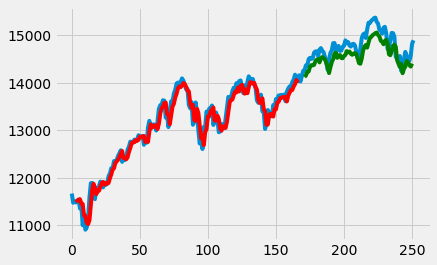

In [11]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan

trainPredictPlot[lookback:len(trainPredict)+lookback,:] = trainPredict

testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan

testPredictPlot[len(trainPredict)+(lookback*2)+1:len(df2)-1,:] = testPredict

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')

In [12]:
trainScore = np.sqrt(mean_squared_error(y_train[0],trainPredict[:,0]))
print(f"The Root Mean Squared Erro ::{trainScore}")

The Root Mean Squared Erro ::171.54451191150676


In [13]:
testScore = np.sqrt(mean_squared_error(y_test[0],testPredict[:,0]))
print(f"The Root Mean Squared Erro ::{testScore}")

The Root Mean Squared Erro ::230.3514205371465


# Textual Data Analysis

In [14]:
news_df = pd.read_csv("india-news-headlines.csv")

In [15]:
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [16]:
news_df.columns = ["Date","Category","Headline"]

In [17]:
news_df

,Date,Category,Headline
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [18]:
news_df.drop('Category',axis=1,inplace=True)

In [19]:
news_df

,Date,Headline
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic
...,...,...
3424062,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,Govt extends deadline for use of FASTag till F...


In [20]:
news_df['Date'] = pd.to_datetime(news_df['Date'],format="%Y-%m-%d")

In [21]:
news_df

,Date,Headline
0,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...
1,1970-01-01 00:00:00.020010102,Fissures in Hurriyat over Pak visit
2,1970-01-01 00:00:00.020010102,America's unwanted heading for India?
3,1970-01-01 00:00:00.020010102,For bigwigs; it is destination Goa
4,1970-01-01 00:00:00.020010102,Extra buses to clear tourist traffic
...,...,...
3424062,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...


In [22]:
news_df['Headline'] = news_df.groupby(['Date']).transform(lambda x:" ".join(x))

In [23]:
news_df

,Date,Headline
0,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...
1,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...
2,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...
3,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...
4,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...
...,...,...
3424062,1970-01-01 00:00:00.020201231,Horoscope Today; 31 December 2020: Check astro...
3424063,1970-01-01 00:00:00.020201231,Horoscope Today; 31 December 2020: Check astro...
3424064,1970-01-01 00:00:00.020201231,Horoscope Today; 31 December 2020: Check astro...
3424065,1970-01-01 00:00:00.020201231,Horoscope Today; 31 December 2020: Check astro...


In [24]:
news_df = news_df.drop_duplicates()

In [25]:
news_df.reset_index(inplace=True,drop=True)

In [26]:
news_df

,Date,Headline
0,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...
1,1970-01-01 00:00:00.020010103,Powerless north India gropes in the dark Think...
2,1970-01-01 00:00:00.020010104,The string that pulled Stephen Hawking to Indi...
3,1970-01-01 00:00:00.020010105,Light combat craft takes India into club class...
4,1970-01-01 00:00:00.020010106,Light combat craft takes India into club class...
...,...,...
7257,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...
7259,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...
7260,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...


In [27]:
def getSubjectibity(text):
    return TextBlob(text).sentiment.subjectivity

In [28]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [29]:
news_df['Subjectivity'] = news_df['Headline'].apply(getSubjectibity)
news_df['Polarity'] = news_df['Headline'].apply(getPolarity)

In [30]:
news_df

,Date,Headline,Subjectivity,Polarity
0,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,1970-01-01 00:00:00.020010103,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,1970-01-01 00:00:00.020010104,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,1970-01-01 00:00:00.020010105,Light combat craft takes India into club class...,0.476612,0.262024
4,1970-01-01 00:00:00.020010106,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7257,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886
7258,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517
7259,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...,0.424021,0.061210
7260,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496


In [31]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()

news_df['Compound'] = [sia.polarity_scores(v)['compound'] for v in news_df['Headline']]
news_df['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_df['Headline']]
news_df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news_df['Headline']]
news_df['Positive'] = [sia.polarity_scores(v)['pos'] for v in news_df['Headline']]
news_df

,Date,Headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,1970-01-01 00:00:00.020010103,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,1970-01-01 00:00:00.020010104,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,1970-01-01 00:00:00.020010105,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,1970-01-01 00:00:00.020010106,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7257,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [32]:
merge = news_df
merge

,Date,Headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,1970-01-01 00:00:00.020010102,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,1970-01-01 00:00:00.020010103,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,1970-01-01 00:00:00.020010104,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,1970-01-01 00:00:00.020010105,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,1970-01-01 00:00:00.020010106,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7257,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [33]:
dff = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
dff

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...
7257,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(dff))
new_df.columns = dff.columns
new_df.index = dff.index
new_df.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.427407,0.00945,0.274775,0.807,0.116776
1,0.407692,0.357550,0.36800,0.274775,0.766,0.182566
2,0.446847,0.356994,0.93690,0.225225,0.797,0.169408
3,0.476612,0.550397,0.98845,0.279279,0.719,0.258224
4,0.439394,0.535354,0.28925,0.342342,0.704,0.235197


In [43]:
X = new_df[0:249]
y =df['Close'][0:249]

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(199, 6)

In [46]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [48]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",np.sqrt(mean_squared_error(prediction,y_test))," RMSE")

[14153.64266589 14406.54382818 12782.36821289 14971.45476557
 12695.0765722  12904.06670884 13369.22815433 14310.38108405
 14728.91946296 14677.92557624]
Date
2021-10-12    14465.919922
2021-06-18    14030.379883
2021-02-05    13856.299805
2021-05-24    13661.169922
2021-05-17    13379.049805
2021-02-02    13612.780273
2020-12-21    12742.519531
2021-06-07    13881.719727
2021-08-30    15265.889648
2021-08-23    14942.650391
Name: Close, dtype: float64
Root mean square error =  781.608354683527  RMSE


In [49]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [51]:
print("Root mean square error = ",np.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  786.7488780754584  RMSE
